In [1]:
# using Statistics
# using SpecialFunctions
using LinearAlgebra
# using Polynomials
using Plots
using IntervalArithmetic
# using BenchmarkTools
# using IntervalMatrices

# Jacobi級数

Jacobi級数とは、直交多項式系であるJacobi多項式を基底とした級数展開であり、次のように書ける。

$$
 f(x) = \sum_{n=0}^\infty a_n P^{k,m}_n(x),\quad x\in[-1,1].
$$

ここで、Jacobi多項式 $P^{(k,m)}_n(x)$ は区間 $[-1,1]$ で、重み関数 $\omega(x):=(1-x)^k(1+x)^m$ に対して直交する直交多項式である。すなわち

$$
    \int_{-1}^1 P^{k,m}_n(x)P^{k,m}_l(x)\omega(x)dx = W_n^{k,m}\delta_{nl},\quad\delta_{nl}=\begin{cases}1, & n=l\\ 0,&n\ne l \end{cases}
$$

をみたす。ただし、$W_n^{(k,m)}$はスケーリング定数で次のような値である。

$$
    W_n^{k,m} = \frac{2^{k+m+1}}{2 n+k+m+1} \frac{\Gamma(n+k+1) \Gamma(n+m+1)}{n ! \Gamma(n+k+m+1)}.
$$


## Jacobi多項式の関数値の計算

一般的な直交多項式の関数値は以下のような3項間漸化式で求められる。

$$
\begin{align}
    p_{n+1}=(a_n x - b_n) p_n - c_n p_{n-1},\quad n\ge 0\\
    p_{-1} = 0,\quad p_0 = k_0.
\end{align}
$$

Jacobi多項式の場合には以下の漸化式より求められる。
$$
\begin{align}
	&P_{n+1}^{k,m} (x) = (\alpha_n x -\beta_n ) P_n^{k,m}(x) - \gamma_n P_{n-1}^{k,m} (x),\quad n\ge 0,\\
    &P^{k,m}_{1}(x) = \frac{1}{2}\{(k+m+2)x+(k-m)\},\quad P^{k,m}_0(x) = 1,%\quad P^{k,m}_1(x) = \frac12(k+m+2)x + \frac12(k-m),
	\end{align}
$$

ただし、

$$
\begin{align}
            % \gamma_n &= 2(n+1)(n+k+m+1)(2n+k+m)\\
		\alpha_n &= \frac{(2n+k+m+1)(2 n +k+m+2)}{2(n+1)(n+k+m+1)}\\[1mm]
		\beta_n &= \frac{(m^2 -k^2)(2n+k +m+1)}{2(n+1)(n+k+m+1)(2n+k+m)}\\[1mm]
		\gamma_n &= \frac{(n+k)(n+m)(2n+k+m+2)}{(n+1)(n+k+m+1)(2n+k+m)}
	\end{align}
$$

である。

またスケールを合わせることで $k=m=0$ のときがLegendre多項式、$k=m=-1/2$ のときChebyshev多項式を表すことになる。

この漸化式を用いたJacobi多項式の関数値は以下のようなコードで得られる。

In [2]:
function jacobiP(n, k, m, x) #引数alp=k,bet=m
    apb = k + m
    if n == 0
        return ones(size(x)) .+ 0
    elseif n == 1
        return 0.5 * ((apb + 2) * x .+ k .- m)
    else
        polylst = ones(size(x))
        poly = 0.5 * ((apb + 2) * x .+ k .- m)
        polyn = zeros(size(x))
        for i = 1:n-1
            a = (2 * i + apb + 1) * (2 * i + apb + 2) / (2 * (i + 1) * (i + apb + 1))
            b = (m^2 - k^2) * (2 * i + apb + 1) / (2 * (i + 1) * (i + apb + 1) * (2 * i + apb))
            c = (i + k) * (i + m) * (2 * i + apb + 2) / ((i + 1) * (i + apb + 1) * (2 * i + apb))
            polyn = (a * x .- b) .* poly .- c * polylst
            polylst = poly
            poly = polyn
        end
        return polyn
    end
end

jacobiP (generic function with 1 method)

例として添え字を $k=1$, $m=1$ としたとき、$0\sim 5$次のヤコビ多項式の関数値は以下のようになる。

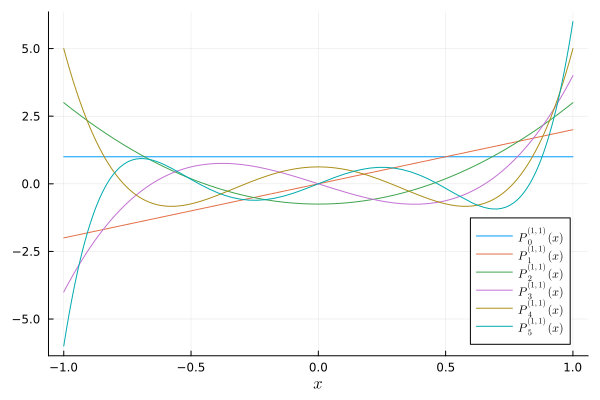

In [3]:
k = 1;
m = 1;
plt = plot()
for n = 0:5
    Pn(x) = jacobiP(n, k, m, x)
    plot!(plt, Pn, -1, 1, label="\$P^{($k,$m)}_{$n}(x)\$")
end
plot!(plt, xlabel="\$x\$")

### 例：第一種チェビシェフ多項式

Jacobi多項式で第一種チェビシェフ多項式 $T_n(x)$ ($k=m=-\frac{1}{2}$) を計算してみる。スケーリングに注意すると次のように与えることができる。

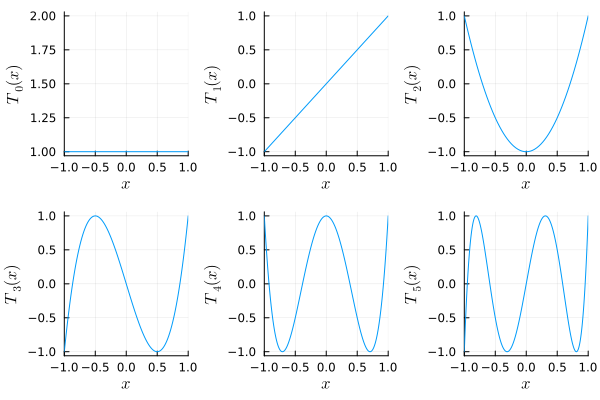

In [4]:
k = -0.5;
m = -0.5;
n = 0
T0(x) = 2^(2 * n) / binomial(2n, n) * jacobiP(0, k, m, x)
plt0 = plot(T0, -1, 1, ylabel="\$T_0(x)\$")

n = 1
T1(x) = 2^(2 * n) / binomial(2n, n) * jacobiP(1, k, m, x)
plt1 = plot(T1, -1, 1, ylabel="\$T_1(x)\$")

n = 2
T2(x) = 2^(2 * n) / binomial(2n, n) * jacobiP(2, k, m, x)
plt2 = plot(T2, -1, 1, ylabel="\$T_2(x)\$")

n = 3
T3(x) = 2^(2 * n) / binomial(2n, n) * jacobiP(3, k, m, x)
plt3 = plot(T3, -1, 1, ylabel="\$T_3(x)\$")

n = 4
T4(x) = 2^(2 * n) / binomial(2n, n) * jacobiP(4, k, m, x)
plt4 = plot(T4, -1, 1, ylabel="\$T_4(x)\$")

n = 5
T5(x) = 2^(2 * n) / binomial(2n, n) * jacobiP(5, k, m, x)
plt5 = plot(T5, -1, 1, ylabel="\$T_5(x)\$")

plot(plt0, plt1, plt2, plt3, plt4, plt5,
    xlabel="\$x\$",
    xlims=(-1, 1),
    #ylims = (-1, 6),
    legend=false)

## Jacobi級数の関数値の計算

### Forsytheアルゴリズム

Jacobi多項式の各次数での係数と定義域内での値における関数値が分かれば、（打ち切った）Jacobi級数の関数値を計算することができる。
そのために、三項間漸化式でJacobi多項式の関数値を求め、係数とかけ足し合わせる手法(**Forsythe** アルゴリズムという)では以下のように計算を行う。

Jacobi多項式の三項間漸化式

$$
P_n^{k,m}(x) - a_n(x)P_{n-1}^{k,m}(x) + b_nP_{n-2}^{k,m}(x) =0,\; P_0^{k,m}=1,\; P_1^{k,m}=\frac{1}{2}\{(k+m+2)x+(k-m)\},
$$
$$
\begin{align}
a_n(x)&=\frac{(2n+k+m-1) \{(2n+k+m-2)(2n+k+m)x +k^2-m^2\}}{2n(n+k+m)(2n+k+m-2)}\\
b_n &=-\frac{(n+k-1)(n+m-1)(2n+k+m)}{n(n+k+m)(2n+k+m-2)}.
\end{align}
$$
について、Jacobi多項式の各次数での係数を$c_n$
とすると補間$f_n$は次の各ステップで求められる。
$$
\begin{align*}
& t_0=\mathrm{P}_0(x)=1, \quad f_0=c_0, \\
& t_1=\mathrm{P}_1(x)=a_1(x), \quad f_1=f_0+c_1 t_1, \\
& \text { for } i=2 \text { to } n \\
& \quad t_i=a_i(x) t_{i-1}+b_i t_{i-2}, \\
& \quad f_i=f_{i-1}+c_i t_i, \\
& \text { end } \\
& p_n(x)=f_n
\end{align*}
$$

Forsytheアルゴリズムを使ってJacobi多項式の関数値を計算するコード `falg` は以下

In [5]:
function falg(n, k, m, c_n, x)
    rec_a(j) = (2 * j + k + m - 1) * ((2 * j + k + m - 2) * (2 * j + k + m) * x .+ k^2 .- m^2) ./ (2 * j * (j + k + m) * (2 * j + k + m - 2))
    rec_b(j) = -(j + k - 1) * (j + m - 1) * (2 * j + k + m) / (j * (j + k + m) * (2 * j + k + m - 2))
    t_0 = 1.0
    f_0 = c_n[1]
    t_1 = ((k + m + 2) * x .+ k .- m) / 2 #rec_a(1)
    f_1 = f_0 .+ (@view c_n[2]) .* t_1
    f_2 = 0.0
    for i = 2:n
        t_2 = rec_a(i) .* t_1 .+ rec_b(i) .* t_0
        f_2 = f_1 .+ (@view c_n[i+1]) .* t_2
        t_0 = t_1
        t_1 = t_2
        f_1 = f_2
    end
    return f_2
end

falg (generic function with 1 method)

### Clenshawのアルゴリズム

Forsytheアルゴリズムよりも計算量について優れた方法としてClenshawのアルゴリズムがある。Clenshawのアルゴリズムでは係数を掛け足しあわせた総和 $p_n(x)=\sum_0^n c_i P_n^{k,m}(x)$は

$$
\begin{align*}
&q_{n+1}=q_{n+2}=0\\
&\text{for}\ k=n\ \text{to}\ 0\ \text{by}\ -1\\
&\quad q_k=c_k+a_{k+1}(x) q_{k+1}+b_{k+2} q_{k+2}\\
&\text{end}\\
&p_n(x)=q_0
\end{align*}
$$

から求められる。これを実装したコード `csalg` を以下に示す。

In [6]:
function csalg(n, k, m, c_n, x)
    function rec_a(j)
        if j == 1
            return ((k + m + 2) .* x .+ (k - m)) ./ 2
        else
            return (2 * j + k + m - 1) * ((2 * j + k + m - 2) * (2 * j + k + m) * x .+ k^2 .- m^2) ./ (2 * j * (j + k + m) * (2 * j + k + m - 2))
        end
    end
    rec_b(j) = -(j + k - 1) * (j + m - 1) * (2 * j + k + m) / (j * (j + k + m) * (2 * j + k + m - 2))
    q2 = 0.0
    q1 = 0.0
    qval = 0.0
    for i = n:-1:0
        qval = @views c_n[i+1] .+ rec_a(i + 1) .* q1 .+ rec_b(i + 2) .* q2
        q2 = q1
        q1 = qval
    end
    return qval
end

csalg (generic function with 1 method)

### Forsytheアルゴリズム(行列形式)

Jacobi多項式による補間をおこなうためには多くの次数でのヤコビ多項式の関数値を高精度に求める必要がある。そこでより高精度に関数値を求め補間を実行する方法を紹介する。

Forsytheアルゴリズムの計算は直行多項式の関数値 $P_n^{k,m}$ の評価と係数を掛けた和の評価の2つのステップに分けられる。
これらを行列形式で表記すると,

$$
F\boldsymbol{p}=\boldsymbol{e_{n+1}} \\
$$

$$
F=\left(\begin{array}{ccccc}
1 & -a_n(x) & -b_n & & \\
& \ddots & \ddots & \ddots & \\
& & \ddots & \ddots & -b_2 \\
& & & \ddots & -a_1(x) \\
& & & & 1
\end{array}\right), \quad \boldsymbol{p}=\left(\begin{array}{c}
\mathrm{P}_n(x) \\
\vdots \\
\vdots \\
\mathrm{P}_1(x) \\
\mathrm{P}_0(x)
\end{array}\right),
\quad \boldsymbol{e}_{n+1}=\left(\begin{array}{c}
0 \\
\vdots \\
\vdots \\
0 \\
1
\end{array}\right),
$$

となり、連立一次方程式を $\boldsymbol{p}$ について解き、次に係数ベクトル $\boldsymbol{c}$ との内積を計算する。すなわち

$$
p_n(x)=\sum_0^n c_i P_n(x)=\boldsymbol{c}^T \boldsymbol{p}
$$

となる。この操作を計算するコード `fmatalg` を記す。

In [7]:
function fmat(n, k, m, x)
    rec_a(j) = (2 * j + k + m - 1) * ((2 * j + k + m - 2) * (2 * j + k + m) .* x .+ k^2 .- m^2) ./ (2 * j * (j + k + m) * (2 * j + k + m - 2))
    rec_b(j) = -(j + k - 1) * (j + m - 1) * (2 * j + k + m) / (j * (j + k + m) * (2 * j + k + m - 2))
    E = Matrix{Float64}(I, n + 1, n + 1)
    F = repeat(E, outer=(1, 1, length(x)))
    F[n, n+1, :] .= -((k + m + 2) .* x .+ k .- m) ./ 2 #-rec_a(1)
    for i = 2:n
        F[n+1-i, n+2-i, :] .= -rec_a(i)
        F[n+1-i, n+3-i, :] .= -rec_b(i)
    end
    return F
end

fmat (generic function with 1 method)

In [8]:
function fmatalg(n, k, m, a_n, x)
    F = fmat(n, k, m, x)
    e = zeros(n + 1)
    e[end] = 1
    # M=rotr90(dropdims(mapslices(x ->  x \ e, F, dims=[1,2]),dims=2))
    #Fとeの右除算からxごと(列方向)の0～n次でのヤコビの関数値(行方向)
    M = Matrix{Float64}(undef, length(x), n + 1)
    Threads.@threads for i = 1:length(x)
        M[i, :] = F[:, :, i] \ e
    end
    reverse!(M, dims=2)
    y = M * a_n
    if length(y) == 1
        return y[1]
    else
        return y
    end
end

fmatalg (generic function with 1 method)

In [9]:
n = 50;
k = 1;
m = 1;
point = range(-1, 1, length=1000)
e = zeros(n + 1);
e[end] = 1;
F = fmat(n, k, m, point) #各xの行列Fを求め纏めた3次元配列
# println(jacobiP(n,k,m,point))

@time rotr90(dropdims(mapslices(x -> x \ e, F, dims=[1, 2]), dims=2)) #Fとeの右除算からxごと(列方向)の0～n次でのヤコビの関数値(行方向)

  0.437984 seconds (2.30 M allocations: 153.670 MiB, 6.20% gc time, 98.79% compilation time)


1000×51 Matrix{Float64}:
 1.0  -2.0      3.0      -4.0      …  49.0        -50.0      51.0
 1.0  -1.996    2.985    -3.96405      9.02407     -8.2376    7.43675
 1.0  -1.99199  2.97003  -3.92826     -4.69382      5.24221  -5.74049
 1.0  -1.98799  2.95509  -3.89265     -6.24063      6.14346  -5.97742
 1.0  -1.98398  2.94018  -3.8572      -3.39281      2.87323  -2.31916
 1.0  -1.97998  2.9253   -3.82192  …  -0.0262809   -0.56393   1.13182
 1.0  -1.97598  2.91045  -3.7868       2.27204     -2.66856   2.99497
 1.0  -1.97197  2.89563  -3.75185      3.15838     -3.24335   3.23788
 1.0  -1.96797  2.88084  -3.71707      2.87947     -2.66403   2.36923
 1.0  -1.96396  2.86608  -3.68245      1.8873      -1.4654    0.999861
 ⋮                                 ⋱                          ⋮
 1.0   1.96797  2.88084   3.71707      2.87947      2.66403   2.36923
 1.0   1.97197  2.89563   3.75185      3.15838      3.24335   3.23788
 1.0   1.97598  2.91045   3.7868       2.27204      2.66856   2.99497
 1.0

In [10]:
M = Matrix{Float64}(undef, length(point), n + 1)
@time Threads.@threads for i = 1:length(point)
    M[i, :] = F[:, :, i] \ e
end
reverse!(M, dims=2)

  0.029261 seconds (38.63 k allocations: 22.583 MiB, 177.76% compilation time)


1000×51 Matrix{Float64}:
 1.0  -2.0      3.0      -4.0      …  49.0        -50.0      51.0
 1.0  -1.996    2.985    -3.96405      9.02407     -8.2376    7.43675
 1.0  -1.99199  2.97003  -3.92826     -4.69382      5.24221  -5.74049
 1.0  -1.98799  2.95509  -3.89265     -6.24063      6.14346  -5.97742
 1.0  -1.98398  2.94018  -3.8572      -3.39281      2.87323  -2.31916
 1.0  -1.97998  2.9253   -3.82192  …  -0.0262809   -0.56393   1.13182
 1.0  -1.97598  2.91045  -3.7868       2.27204     -2.66856   2.99497
 1.0  -1.97197  2.89563  -3.75185      3.15838     -3.24335   3.23788
 1.0  -1.96797  2.88084  -3.71707      2.87947     -2.66403   2.36923
 1.0  -1.96396  2.86608  -3.68245      1.8873      -1.4654    0.999861
 ⋮                                 ⋱                          ⋮
 1.0   1.96797  2.88084   3.71707      2.87947      2.66403   2.36923
 1.0   1.97197  2.89563   3.75185      3.15838      3.24335   3.23788
 1.0   1.97598  2.91045   3.7868       2.27204      2.66856   2.99497
 1.0

実際に関数値をプロットしてみると、各Jacobi多項式の概形がプロットされる。

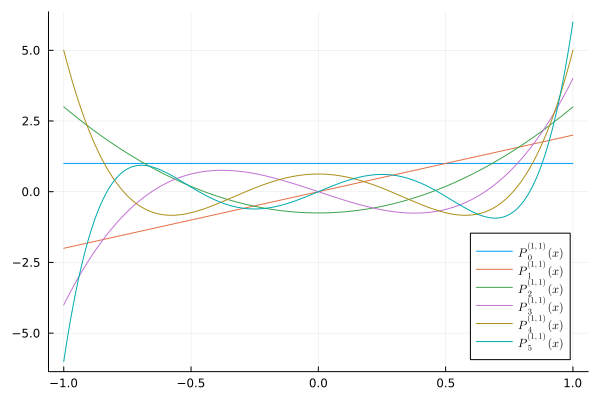

In [11]:
plot(Vector(point), M[:, 1], label="\$P^{($k,$m)}_{0}(x)\$")
plot!(Vector(point), M[:, 2], label="\$P^{($k,$m)}_{1}(x)\$")
plot!(Vector(point), M[:, 3], label="\$P^{($k,$m)}_{2}(x)\$")
plot!(Vector(point), M[:, 4], label="\$P^{($k,$m)}_{3}(x)\$")
plot!(Vector(point), M[:, 5], label="\$P^{($k,$m)}_{4}(x)\$")
plot!(Vector(point), M[:, 6], label="\$P^{($k,$m)}_{5}(x)\$")

### それぞれの補間アルゴリズムを比較してみる

次数に伴って小さくなるよう適当な係数を準備する

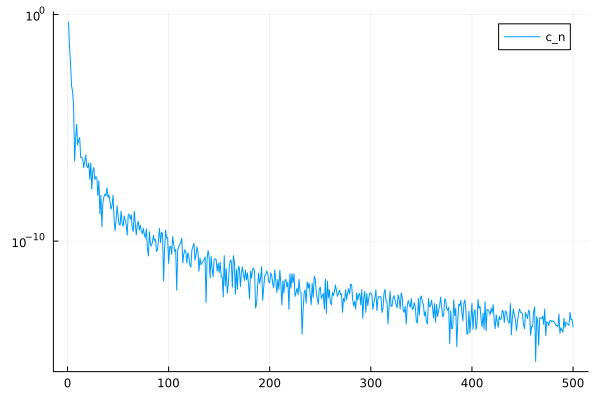

In [12]:
N = 500
c_n = randn(N) ./ (1:N) .^ 5
plot(abs.(c_n), yscale=:log10, label="c_n")

同じ係数に対し同じ関数値が得られる.

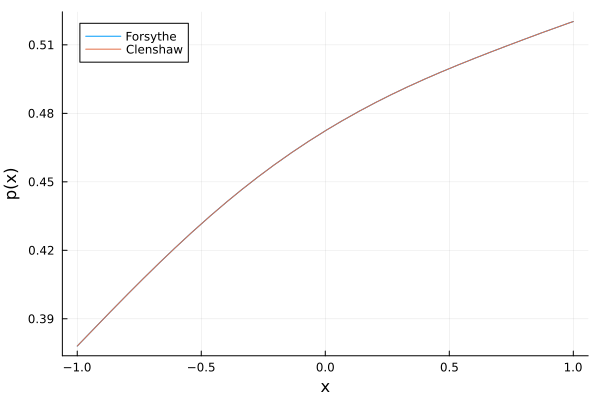

In [13]:
k = 1;
m = 1;
n = N - 1;
# x = range(-1,1,length=1000)
plot(x -> falg(n, k, m, c_n, x), -1, 1, label="Forsythe",xlabel="x",ylabel="p(x)")
plot!(x -> csalg(n, k, m, c_n, x), -1, 1, label="Clenshaw")
# plot!(x -> fmatalg(n,k,m,c_n,x),-1,1,label="Fmat")

実行速度を比較してみる.

係数をランダムにとり,区間$[-1,1]$のランダムな何点かでの補間の関数値を求める.
それぞれについて次数を増やしたとき実行時間を測る.

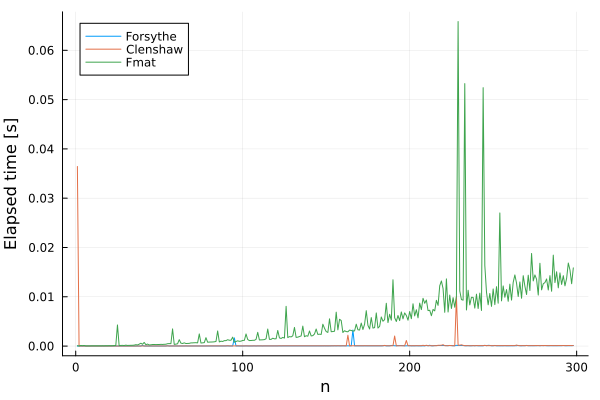

In [14]:
point = 2 .* rand(50) .- 1
N = 300
c_n = randn(N) ./ (1:N) .^ 5
f_time = Vector{Float64}(undef, N);
cs_time = Vector{Float64}(undef, N);
fmat_time = Vector{Float64}(undef, N);
for i = 2:N
    c_i = c_n[1:i]
    f_time[i] = @elapsed falg(i - 1, k, m, c_i, point)
    cs_time[i] = @elapsed csalg(i - 1, k, m, c_i, point)
    fmat_time[i] =@elapsed fmatalg(i-1,k,m,c_i,point)
end
# plot(f_time[3:end], label="forsythe", xlabel="n", ylabel="s", ylims=(0, 0.002))
plot(f_time[3:end], label="Forsythe", xlabel="n", ylabel="Elapsed time [s]")
plot!(cs_time[3:end], label="Clenshaw", xlabel="n", ylabel="Elapsed time [s]")
plot!(fmat_time[3:end],label="Fmat",xlabel="n",ylabel="Elapsed time [s]")

## Jacobi級数の関数値の精度保証

次に各アルゴリズムを区間演算を用いて精度保証付き数値計算でおこなう

### Forsythe アルゴリズム

In [15]:
# 多重ディスパッチを使う
function falg(n, k, m, c_n::Vector{Interval{T}}, x::Vector{Interval{T}}) where T
    k = interval(convert(T,k)); m = interval(convert(T,m))
    rec_a(j) = (2 * j + k + m - 1) * ((2 * j + k + m - 2) * (2 * j + k + m) * x .+ k^interval(2) .- m^interval(2)) ./ (2 * j * (j + k + m) * (2 * j + k + m - 2))
    rec_b(j) = -(j + k - 1) * (j + m - 1) * (2 * j + k + m) / (j * (j + k + m) * (2 * j + k + m - 2))
    t_0 = 1.0
    f_0 = c_n[1]
    t_1 = ((k + m + 2) * x .+ k .- m) / 2 #rec_a(1)
    f_1 = f_0 .+ (c_n[2]) .* t_1
    f_2 = 0.0
    for i = 2:n
        t_2 = rec_a(i) .* t_1 .+ rec_b(i) .* t_0
        f_2 = f_1 .+ (c_n[i+1]) .* t_2
        t_0 = t_1
        t_1 = t_2
        f_1 = f_2
    end
    return f_2
end
# 
function falg(n, k, m, c_n, x::Vector{Interval{T}}) where T
    return falg(n, k, m, interval(convert.(T,c_n)), x)
end
# 
function falg(n, k, m, c_n::Vector{Interval{T}}, x) where T
    if length(x) == 1
        x = [x]
    end
    return falg(n, k, m, c_n, interval(convert.(T,x)))
end

falg (generic function with 4 methods)

In [16]:
# function f_interval(n, k, m, c_n, x)
#     k = interval(big(k))
#     m = interval(big(m))
#     x = interval.(big.(x))
#     rec_a(j) = (2 * j + k + m - 1) * ((2 * j + k + m - 2) * (2 * j + k + m) * x .+ k^2 .- m^2) ./ (2 * j * (j + k + m) * (2 * j + k + m - 2))
#     rec_b(j) = -(j + k - 1) * (j + m - 1) * (2 * j + k + m) / (j * (j + k + m) * (2 * j + k + m - 2))
#     t_n = IntervalMatrix{BigFloat}(undef, n + 1, length(x))
#     f_n = IntervalMatrix{BigFloat}(undef, n + 1, length(x))
#     t_n[1, :] .= 1
#     f_n[1, :] .= @view c_n[1]
#     t_n[2, :] .= t_n[2, :] .= ((k + m + 2) .* x .+ (k - m)) ./ 2 #rec_a(interval(1))
#     f_n[2, :] = @views(f_n[1, :] .+ c_n[2] .* t_n[2, :])
#     for i = 2:n
#         t_n[i+1, :] = @views(rec_a(interval(i)) .* t_n[i, :] .+ rec_b(interval(i)) .* t_n[i-1, :])
#         f_n[i+1, :] = @views(f_n[i, :] .+ c_n[i+1] .* t_n[i+1, :])
#     end
#     if length(x) == 1
#         return f_n[n+1, 1]
#     else
#         return f_n[n+1, :]
#     end
# end

### Clenshaw のアルゴリズム

In [17]:
# 多重ディスパッチを使う
function csalg(n, k, m, c_n::Vector{Interval{T}}, x::Vector{Interval{T}}) where T
    k = interval(convert(T,k)); m = interval(convert(T,m))
    function rec_a(j)
        if j == 1
            return ((k + m + 2) .* x .+ (k - m)) ./ 2
        else
            return (2 * j + k + m - 1) * ((2 * j + k + m - 2) * (2 * j + k + m) * x .+ k^2 .- m^2) ./ (2 * j * (j + k + m) * (2 * j + k + m - 2))
        end
    end
    rec_b(j) = -(j + k - 1) * (j + m - 1) * (2 * j + k + m) / (j * (j + k + m) * (2 * j + k + m - 2))
    q2 = 0.0
    q1 = 0.0
    qval = 0.0
    for i = n:-1:0
        qval =  c_n[i+1] .+ rec_a(i + 1) .* q1 .+ rec_b(i + 2) .* q2
        q2 = q1
        q1 = qval
    end
    return qval
end
# 
function csalg(n, k, m, c_n, x::Vector{Interval{T}}) where T
    return csalg(n, k, m, interval(convert.(T,c_n)), x)
end
# 
function csalg(n, k, m, c_n::Vector{Interval{T}}, x) where T
    if length(x) == 1
        x = [x]
    end
    return csalg(n, k, m, c_n, interval(convert.(T,Vector(x))))
end

csalg (generic function with 4 methods)

In [18]:
# function cs_interval(n, k, m, c_n, x)
#     k = interval(big(k))
#     m = interval(big(m))
#     x = interval.(big.(x))
#     q = zeros(Interval{BigFloat}, n + 3, length(x))
#     function rec_a(j)
#         if j == 1
#             return ((k + m + 2) .* x .+ (k - m)) ./ 2
#         else
#             return (2 * j + k + m - 1) * ((2 * j + k + m - 2) * (2 * j + k + m) * x .+ k^2 .- m^2) ./ (2 * j * (j + k + m) * (2 * j + k + m - 2))
#         end
#     end
#     rec_b(j) = -(j + k - 1) * (j + m - 1) * (2 * j + k + m) / (j * (j + k + m) * (2 * j + k + m - 2))
#     for i = n:-1:0
#         q[i+1, :] = @views c_n[i+1] .+ rec_a(interval(i + 1)) .* q[i+2, :] .+ rec_b(interval(i + 2)) .* q[i+3, :]
#     end
#     if length(x) == 1
#         return q[1, 1]
#     else
#         return q[1, :]
#     end
# end

### Forsytheアルゴリズム(行列形式)

In [19]:
# 多重ディスパッチを使う
function fmat(n, k::Interval{T}, m::Interval{T}, x::Vector{Interval{T}}) where T
    rec_a(j) = (2 * j + k + m - 1) * ((2 * j + k + m - 2) * (2 * j + k + m) .* x .+ k^2 .- m^2) ./ (2 * j * (j + k + m) * (2 * j + k + m - 2))
    rec_b(j) = -(j + k - 1) * (j + m - 1) * (2 * j + k + m) / (j * (j + k + m) * (2 * j + k + m - 2))
    F = repeat(interval(Matrix{T}(I, n + 1, n + 1)), outer=(1, 1, length(x)))
    F[n, n+1, :] .= -((k + m + 2) .* x .+ k .- m) ./ 2 #-rec_a(1)
    for i = 2:n
        F[n+1-i, n+2-i, :] .= -rec_a(i)
        F[n+1-i, n+3-i, :] .= -rec_b(i)
    end
    return F
end

# function fmat(n, k::Interval{T}, m::Interval{T}, x::Vector{Interval{T}}) where T
#     k = interval(big(k))
#     m = interval(big(m))
#     x = interval.(big.(x))
#     rec_a(j) = (2 * j + k + m - 1) * ((2 * j + k + m - 2) * (2 * j + k + m) .* x .+ k^2 .- m^2) ./ (2 * j * (j + k + m) * (2 * j + k + m - 2))
#     rec_b(j) = -(j + k - 1) * (j + m - 1) * (2 * j + k + m) / (j * (j + k + m) * (2 * j + k + m - 2))
#     E = IntervalMatrix(interval(big(1)) * I, n + 1, n + 1)
#     F = repeat(E, outer=(1, 1, length(x)))
#     F[n, n+1, :] .= -((k + m + 2) .* x .+ (k - m)) ./ 2 #-rec_a(interval(1))
#     for i = big.(2:n)
#         F[n+1-i, n+2-i, :] .= -rec_a(interval(i))
#         F[n+1-i, n+3-i, :] .= -rec_b(interval(i))
#     end
#     return F
# end

fmat (generic function with 2 methods)

関数値ベクトルを求める際に区間ガウスの消去法を用いているため, 前処理行列$F^{-1}$を掛けている

In [39]:
function fmatalg(n, k, m, a_n::Vector{Interval{T}}, x::Vector{Interval{T}}) where T
    k = interval(convert(T,k)); m = interval(convert(T,m))
    F = fmat(n, k, m, x)
    e = zeros(n + 1)
    e[end] = 1
    # M = rotr90(dropdims(mapslices(x -> (inv(mid.(x)) * x) \ (inv(mid.(x)) * e), F, dims=[1, 2]), dims=2))
    #Fとeの右除算からxごと(列方向)の0～n次でのヤコビの関数値(行方向)
    M = Matrix{Interval{T}}(undef, length(x), n + 1)
    Threads.@threads for i = 1:length(x)
        R = inv(mid.(F[:, :, i]))
        A = R * F[:, :, i]
        B = R*e
        # Csup=interval(sup.(A)) \ B
        # Cinf=interval(inf.(A)) \ B
        # M[i,:]=interval.(min.(Csup,Cinf),max.(Csup,Cinf)) #エラー回避用
        M[i, :] = A \ B
    end
    reverse!(M, dims=2)
    y = M * a_n
    if length(y) == 1
        return y[1]
    else
        return y
    end
end

function fmatalg(n, k, m, a_n, x::Vector{Interval{T}}) where T
    return fmatalg(n, k, m, interval(convert.(T,a_n)), x)
end

function fmatalg(n, k, m, a_n::Vector{Interval{T}}, x) where T
    if length(x) == 1
        x = [x]
    end
    return fmatalg(n, k, m, a_n, interval(convert.(T,x)))
end

fmatalg (generic function with 4 methods)

In [21]:
# function fmat_intp_interval(n, k, m, a_n, x)
#     F = fmat_interval(n, k, m, x)
#     e = zeros(n + 1)
#     e[end] = 1
#     p = dropdims(mapslices(x -> (inv(mid.(x)) * x) \ (inv(mid.(x)) * e), F, dims=[1, 2]), dims=2)
#     #区間ガウスの消去法について両辺に前処理行列を掛けている
#     y = p' * reverse(a_n)
#     if length(y) == 1
#         return y[1]
#     else
#         return y
#     end
# end

In [22]:
setprecision(BigFloat, 256)

256

係数をランダムな区間数値で作成する

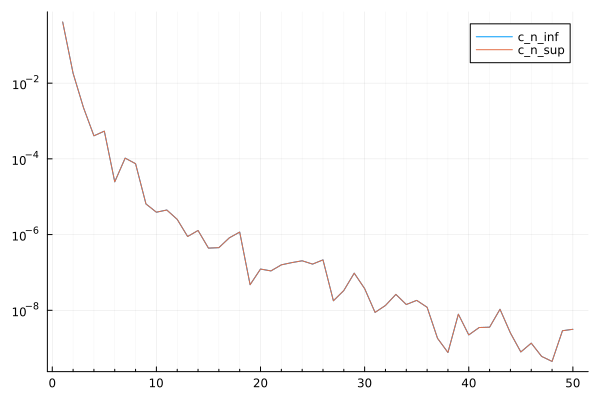

In [42]:
N = 50
# c_n = interval.(big.(randn(N))) ./ (1:N).^5
# r = big.(randn(N)) ./ (1:N) .^ 5 # use multi-precision
r = (randn(N)) ./ (1:N) .^ 5 # use double precision
c_n = interval.(r, r)
# c_n = interval.(r,r .+ (rand(N)).*1e-16 .* (1:N))
# println(radius.(c_n))
plot(abs.(inf.(c_n)), yscale=:log10, xminorgrid=true, label="c_n_inf")
plot!(abs.(sup.(c_n)), yscale=:log10, label="c_n_sup")

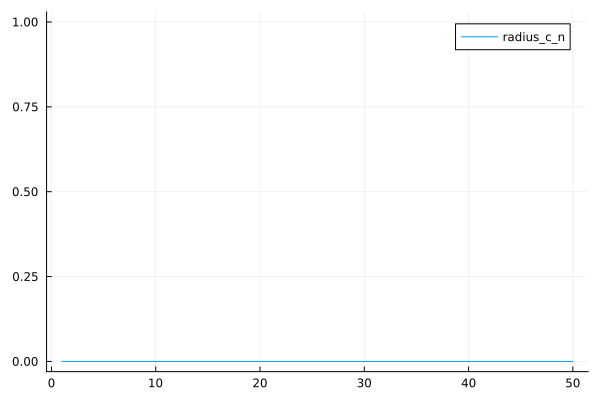

In [24]:
plot(radius.(c_n), label="radius_c_n")

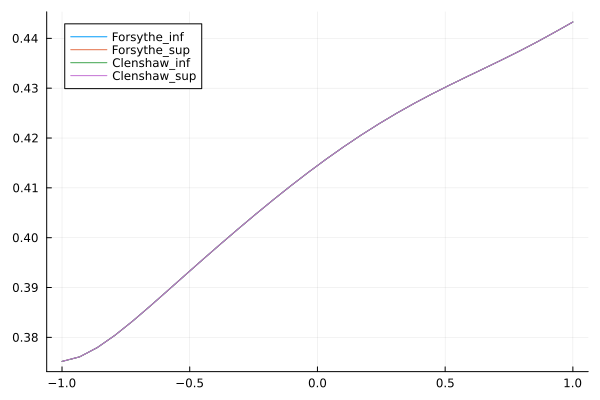

In [43]:
k = 1;
m = 1;
n = N - 1;
x = Vector(range(-1, 1, length=30))
# x = 0.1
y1 = falg(n, k, m, c_n, x)
y2 = csalg(n, k, m, c_n, x)
y3 = fmatalg(n, k, m, c_n, x)
plot(x, inf.(y1), label="Forsythe_inf")
plot!(x, sup.(y1), label="Forsythe_sup")
plot!(x, inf.(y2), label="Clenshaw_inf")
plot!(x, sup.(y2), label="Clenshaw_sup")

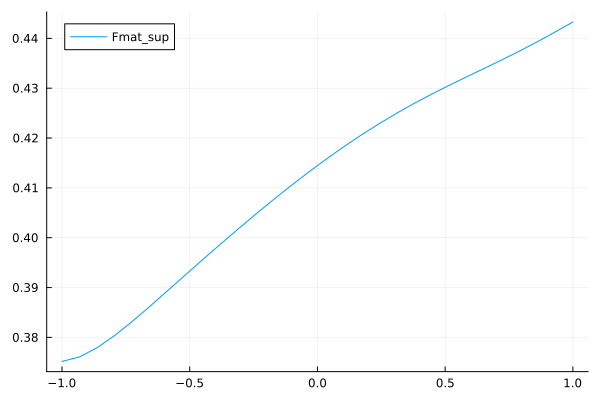

In [44]:
y3 = fmatalg(n, k, m, c_n, x)
plot(x, inf.(y3), label="Fmat_inf")
plot(x, sup.(y3), label="Fmat_sup")

次数ごとの実行速度を比較したものは以下の通り.

## Speed comparison of three algorithms (with interval arithmetic) 

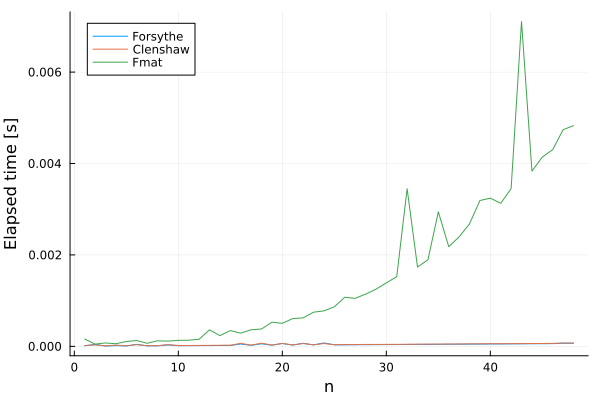

In [27]:
point = 2 .* rand() .- 1
# N=50
# c_n = interval.(big.(randn(N))) ./ (1:N).^5
# r=big.(randn(N))
# c_n = interval.(r,r.+abs.(randn(N)).*1e-15) ./ (1:N).^5

f_time = Vector{Float64}(undef, N);
cs_time = Vector{Float64}(undef, N);
fmat_time = Vector{Float64}(undef, N);
for i = 2:N
    c_i = c_n[1:i]
    f_time[i] = @elapsed falg(i - 1, k, m, c_i, point)
    cs_time[i] = @elapsed csalg(i - 1, k, m, c_i, point)
    fmat_time[i] = @elapsed fmatalg(i - 1, k, m, c_i, point)
end
plot(f_time[3:end], label="Forsythe", xlabel="n", ylabel="Elapsed time [s]")
plot!(cs_time[3:end], label="Clenshaw", xlabel="n", ylabel="Elapsed time [s]")
plot!(fmat_time[3:end], label="Fmat", xlabel="n", ylabel="Elapsed time [s]")
# savefig("Comparison_of_elapsedtime.pdf")

In [28]:
fmat_time[end]

0.004828542

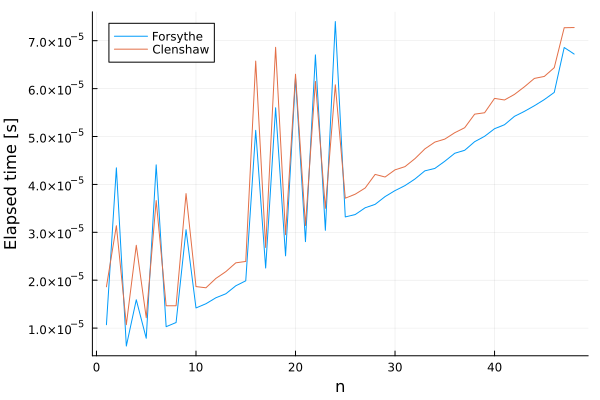

In [29]:
plot(f_time[3:end], label="Forsythe", xlabel="n", ylabel="Elapsed time [s]")
plot!(cs_time[3:end], label="Clenshaw", xlabel="n", ylabel="Elapsed time [s]")

区間演算を用いる場合実行速度ではForsytheアルゴリズムが最も優れている.

また次数ごとの区間幅の増減は以下の通り.

## Accuracy comparison of three algorithms with interval arithmetic

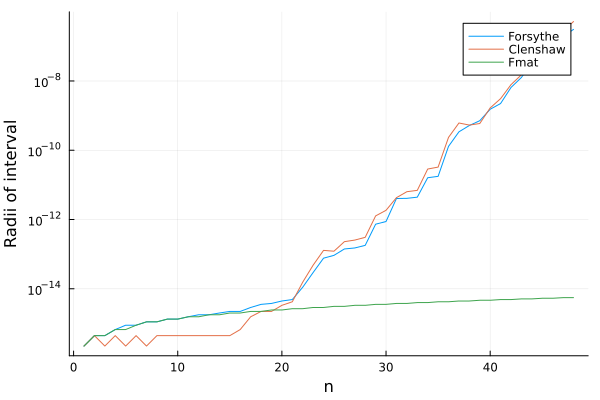

In [30]:
point = (2 .* rand(10) .- 1) #.± 1e-32
# point = interval.(-1:10:1, 1e-32, format = :midpoint)
# point = interval.((2 .* rand(10) .- 1), 1e-16,format = :midpoint)
# point = interval.(big.(2 .* rand(10) .- 1), 1e-32,format = :midpoint)
# point = interval.((2 .* rand(10) .- 1), 1e-32*ones(10), format = :midpoint)
# N=50
# c_n = interval.(big.(randn(N))) ./ (1:N).^5
# r=big.(randn(N))
# c_n = interval.(r,r.+abs.(randn(N)).*1e-15) ./ (1:N).^5
# c_n = interval.(BigFloat.(inf.(c_n)),BigFloat.(sup.(c_n)))


f_rad = Vector{typeof(mid(c_n[1]))}(undef, N);
cs_rad = Vector{typeof(mid(c_n[1]))}(undef, N);
fmat_rad = Vector{typeof(mid(c_n[1]))}(undef, N);
for i = 3:N
    c_i = c_n[1:i]
    f_rad[i] = maximum(radius, falg(i - 1, k, m, c_i, point))
    cs_rad[i] = maximum(radius, csalg(i - 1, k, m, c_i, point))
    fmat_rad[i] = maximum(radius, fmatalg(i - 1, k, m, c_i, point))
end
plot(f_rad[3:end], label="Forsythe", xlabel="n", ylabel="Radii of interval", yscale=:log10)
plot!(cs_rad[3:end], label="Clenshaw", xlabel="n", ylabel="Radii of interval", yscale=:log10)
plot!(fmat_rad[3:end], label="Fmat", xlabel="n", ylabel="Radii of interval", yscale=:log10)
# savefig("Comparison_of_radii.pdf")

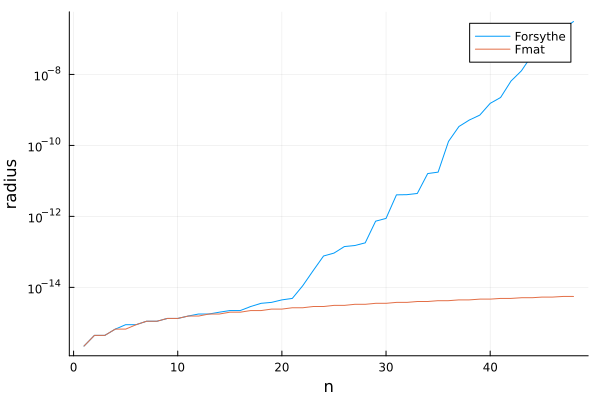

In [31]:
plot(f_rad[3:end], label="Forsythe", xlabel="n", ylabel="radius", yscale=:log10)
# plot!(cs_rad[3:end],label="clenshaw",xlabel="n",ylabel="radius")
plot!(fmat_rad[3:end], label="Fmat", xlabel="n", ylabel="radius", yscale=:log10)

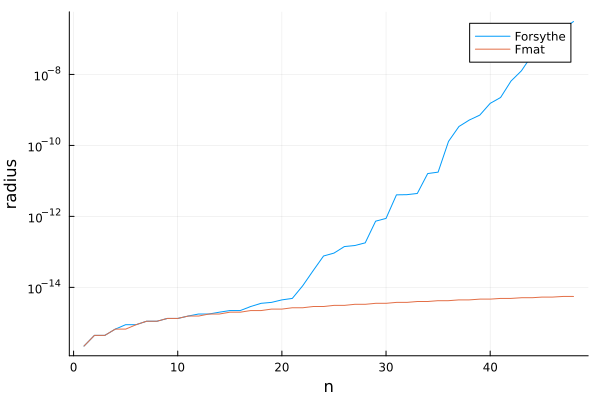

In [32]:
plot(f_rad[3:end], label="Forsythe", xlabel="n", ylabel="radius", yscale=:log10)
# plot!(cs_rad[3:end],label="clenshaw",xlabel="n",ylabel="radius")
plot!(fmat_rad[3:end], label="Fmat", xlabel="n", ylabel="radius", yscale=:log10)

In [33]:
# fmat_rad
cs_rad[end]

5.20664328318432e-7

## Accuracy comparison varying  the precision of numbers

In [34]:
setprecision(BigFloat, 256)
N = 50
k = 1;
m = 1;
n = N - 1;
# c_n = interval.(big.(randn(N))) ./ (1:N).^5
r = big.(randn(N)) ./ (1:N) .^ 5 # use multi-precision
# r = (randn(N)) ./ (1:N) .^ 5 # use double precision
c_n = interval.(r, r)
point = interval.(big.(2 .* rand(10) .- 1), 0,format = :midpoint)

10-element Vector{Interval{BigFloat}}:
 [0.753221, 0.753223]₂₅₆_com
 [-0.579411, -0.57941]₂₅₆_com
 [-0.82908, -0.829079]₂₅₆_com
 [-0.157279, -0.157278]₂₅₆_com
 [0.730558, 0.73056]₂₅₆_com
 [-0.486471, -0.48647]₂₅₆_com
 [-0.30752, -0.307519]₂₅₆_com
 [0.25249, 0.252491]₂₅₆_com
 [0.986903, 0.986904]₂₅₆_com
 [0.584285, 0.584287]₂₅₆_com

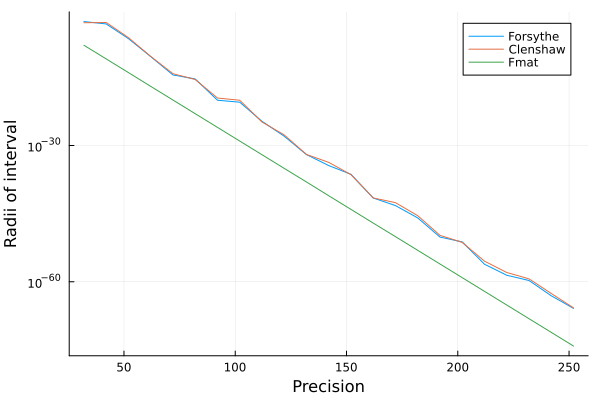

In [35]:
imin = 32
imax = 256
incr = 10

f_rad = Vector{typeof(mid(c_n[1]))}(undef, length(imin:incr:imax));
cs_rad = Vector{typeof(mid(c_n[1]))}(undef, length(imin:incr:imax));
fmat_rad = Vector{typeof(mid(c_n[1]))}(undef, length(imin:incr:imax));
ind = 1
for i = imin:incr:imax
    setprecision(BigFloat, i)
    r = big.(ones(N)) ./ (1:N) .^ 5
    c_n = interval.(r, r)
    point = interval.(big.(2 .* rand(10) .- 1), 0,format = :midpoint)
    # point = interval.(Vector(big.(-1:0.2:1)), 0,format = :midpoint)
    f_rad[ind] = maximum(radius, falg(N-1, k, m, c_n, point))
    cs_rad[ind] = maximum(radius, csalg(N-1, k, m, c_n, point))
    fmat_rad[ind] = maximum(radius, fmatalg(N-1, k, m, c_n, point))
    ind += 1
end
plot(imin:incr:imax,f_rad, label="Forsythe", xlabel="Precision", ylabel="Radii of interval", yscale=:log10)
plot!(imin:incr:imax,cs_rad, label="Clenshaw", xlabel="Precision", ylabel="Radii of interval", yscale=:log10)
plot!(imin:incr:imax,fmat_rad, label="Fmat", xlabel="Precision", ylabel="Radii of interval", yscale=:log10)

区間演算を用いる場合, Forsythe, Clenshawアルゴリズムは区間幅が増大するが, 行列$F$を用いた場合はそこまで悪化しない事がわかる.

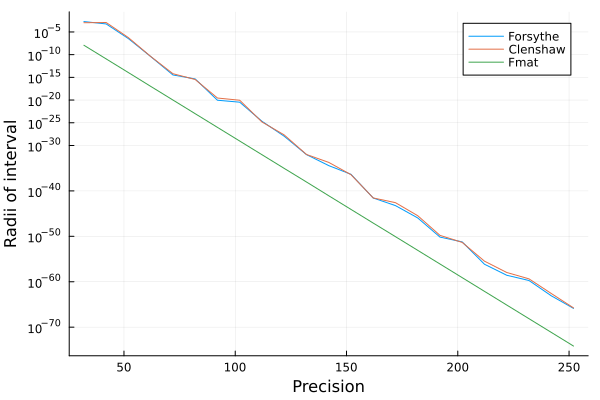

In [36]:
yticks!([10^0,10^(-5),10^(-10),10^(-15),10^(-20),10^(-25),10^(-30),10^(-40),10^(-50),10^(-60),10^(-70)])


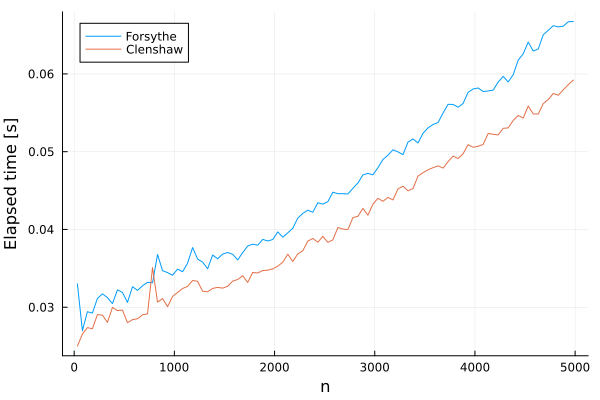

In [37]:
N = 200; #imax = 150
imin = 32
imax = 5000
incr = 50
ind = 1
f_time = Vector{Float64}(undef, length(imin:incr:imax));
cs_time = Vector{Float64}(undef, length(imin:incr:imax));
fmat_time = Vector{Float64}(undef, length(imin:incr:imax));
for i = imin:incr:imax
    setprecision(BigFloat, i)
    r = big.(ones(N)) ./ ((1:N) .^ 2)
    c_n = interval.(r, r)
    point = interval.(big.(2 .* rand(10) .- 1), 0,format = :midpoint)
    # c_i = c_n[1:i]
    f_time[ind] = @elapsed falg(N - 1, k, m, c_n, point)
    cs_time[ind] = @elapsed csalg(N - 1, k, m, c_n, point)
    # fmat_time[ind] = @elapsed fmatalg(N - 1, k, m, c_n, point)
    ind += 1
end
plot(imin:incr:imax,f_time, label="Forsythe", xlabel="n", ylabel="Elapsed time [s]")
plot!(imin:incr:imax,cs_time, label="Clenshaw", xlabel="n", ylabel="Elapsed time [s]")
# plot!(imin:incr:imax,fmat_time, label="Fmat", xlabel="n", ylabel="Elapsed time [s]")

# plot!(imin:incr:imax,f_rad, label="Forsythe", xlabel="Precision", ylabel="Radii of interval", yscale=:log10)
# plot!(imin:incr:imax,cs_rad, label="Clenshaw", xlabel="Precision", ylabel="Radii of interval", yscale=:log10)
# plot!(imin:incr:imax,fmat_rad, label="Fmat", xlabel="Precision", ylabel="Radii of interval", yscale=:log10)

In [38]:
f_rad[1] # 0.010577 seconds
# fmat_rad[1] # 4.096006 seconds
# using IJulia
# installkernel("Julia (6 threads)", specname="julia-6-threads", env=Dict("JULIA_PROJECT"=>"@.", "JULIA_NUM_THREADS"=>"6"))

0.0019373882096

本資料は以下のような文献・Web ページ等を参考に書いています。

### 参考文献
1. Jie Shen, Tao Tang, Li-Lian Wang, Spectral Methods -Algorithms, Analysis and Applications-, Springer Berlin, Heidelberg, 2011.
(直交多項式を用いたスペクトル法の理論からコードの実装まで丁寧に解説されている教科書)

阪田智也